In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
import statistics
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import gc

### load data

In [45]:
df = pd.read_pickle('train4')[:200000]
test = pd.read_pickle('test4')

### simple features

In [ ]:
df['CG1div'],df['CG2div'],df['CG3div'] = 0,0,0
test['CG1div'],test['CG2div'],test['CG3div'] = 0,0,0

for col in ['CG1','CG2','CG3']: #df[col] = df[col].str.split(',')
    df['{}len'.format(col)] = df[col].str.count(",") + 1
    df['{}max'.format(col)] = df[col].apply(lambda x: max(map(int, x.split(','))))
    df['{}min'.format(col)] = df[col].apply(lambda x: min(map(int, x.split(','))))
    df['{}sum'.format(col)] = df[col].apply(lambda x: sum(map(int, x.split(','))))
    df['{}mean'.format(col)] = df['{}sum'.format(col)]/df['{}len'.format(col)]
    df['{}maxmindelta'.format(col)] = df['{}max'.format(col)] - df['{}min'.format(col)]
    df['{}unique'.format(col)] = df[col].apply(lambda x: len(set(map(int, x.split(',')))))
    df['{}ratio'.format(col)] = df['{}unique'.format(col)]/df['{}len'.format(col)]
    
    test['{}len'.format(col)] = test[col].str.count(",") + 1
    test['{}max'.format(col)] = test[col].apply(lambda x: max(map(int, x.split(','))))
    test['{}min'.format(col)] = test[col].apply(lambda x: min(map(int, x.split(','))))
    test['{}sum'.format(col)] = test[col].apply(lambda x: sum(map(int, x.split(','))))
    test['{}mean'.format(col)] = test['{}sum'.format(col)]/test['{}len'.format(col)]
    test['{}maxmindelta'.format(col)] = test['{}max'.format(col)] - test['{}min'.format(col)]
    test['{}unique'.format(col)] = test[col].apply(lambda x: len(set(map(int, x.split(',')))))
    test['{}ratio'.format(col)] = test['{}unique'.format(col)]/test['{}len'.format(col)]
    
    print(col)
    
div = df[['CG1len','CG2len','CG3len']].div(df[['CG1len','CG2len','CG3len']].sum(axis=1), axis=0)
div2 = test[['CG1len','CG2len','CG3len']].div(test[['CG1len','CG2len','CG3len']].sum(axis=1), axis=0)

df['CG1div'],df['CG2div'],df['CG3div'] = div['CG1len'],div['CG2len'],div['CG3len']
test['CG1div'],test['CG2div'],test['CG3div'] = div2['CG1len'],div2['CG2len'],div2['CG3len']

for col in ['CG1']: #df[col] = df[col].str.split(',')
    df['{}std'.format(col)] = 0
    df.loc[df['{}len'.format(col)]>1,'{}std'.format(col)] = df.loc[df['{}len'.format(col)]>1,col].apply(lambda x: statistics.stdev(map(int, x.split(','))))
    test['{}std'.format(col)] = 0
    test.loc[test['{}len'.format(col)]>1,'{}std'.format(col)] = test.loc[test['{}len'.format(col)]>1,col].apply(lambda x: statistics.stdev(map(int, x.split(','))))
    print('done')

### extended statictics for CG*

In [ ]:
for col in ['CG1']: #df[col] = df[col].str.split(',')
    for d in [df,test]:
        d['{}harmonic_mean'.format(col)] = 0
        d.loc[d['{}len'.format(col)]>1,'{}harmonic_mean'.format(col)] = d.loc[d['{}len'.format(col)]>1,col].apply(lambda x: statistics.harmonic_mean(map(int, x.split(','))))
        d['{}median'.format(col)] = 0
        d.loc[d['{}len'.format(col)]>1,'{}median'.format(col)] = d.loc[d['{}len'.format(col)]>1,col].apply(lambda x: statistics.median(map(int, x.split(','))))
        d['{}median_low'.format(col)] = 0
        d.loc[d['{}len'.format(col)]>1,'{}median_low'.format(col)] = d.loc[d['{}len'.format(col)]>1,col].apply(lambda x: statistics.median_low(map(int, x.split(','))))
        d['{}median_high'.format(col)] = 0
        d.loc[d['{}len'.format(col)]>1,'{}median_high'.format(col)] = d.loc[d['{}len'.format(col)]>1,col].apply(lambda x: statistics.median_high(map(int, x.split(','))))
        d['{}median_grouped'.format(col)] = 0
        d.loc[d['{}len'.format(col)]>1,'{}median_grouped'.format(col)] = d.loc[d['{}len'.format(col)]>1,col].apply(lambda x: statistics.median_grouped(map(int, x.split(','))))

In [7]:
print('[train,test]:')
for col in test.columns[1:]:
    if df[col].dtype in [np.int8, np.int16, np.int32, np.int64, np.float64,np.float16]:
        print(col,[df[col].nunique(),test[col].nunique()],
              'max:',[df[col].max(),test[col].max()],'min:',[df[col].min(),test[col].min()],
              'mean:',[df[col].mean(),test[col].mean()],'std:',[df[col].std(),test[col].std()])

[train,test]:
C1 [2440, 1724] max: [0.732, 0.7065] min: [0.0, 0.0] mean: [nan, 0.002436] std: [0.0, 0.01002]
C2 [4814, 3967] max: [0.409, 0.186] min: [0.0, 0.0] mean: [nan, 0.002996] std: [0.0, 0.00684]
C3 [2596, 1959] max: [0.1473, 0.0789] min: [0.0, 0.0] mean: [nan, 0.002857] std: [0.0, 0.005436]
C4 [4535, 3666] max: [0.409, 0.186] min: [0.0, 0.0] mean: [nan, 0.00296] std: [0.0, 0.00644]
C5 [95, 87] max: [0.409, 0.02052] min: [0.0, 0.0] mean: [nan, 0.002869] std: [0.0, 0.004005]
C6 [1291, 1237] max: [0.2932, 0.1147] min: [0.0, 0.0] mean: [nan, 0.002878] std: [0.0, 0.003275]
C7 [3, 3] max: [0.005104, 0.005104] min: [0.002317, 0.002317] mean: [nan, 0.002493] std: [0.0, 0.0002441]
C8 [283, 250] max: [0.999, 0.999] min: [0.0, 0.0] mean: [nan, 0.002926] std: [0.0, 0.00599]
C9 [85, 77] max: [0.6523, 0.04758] min: [0.0, 0.0] mean: [nan, 0.002892] std: [0.0, 0.00301]
C10 [468, 444] max: [0.2052, 0.1185] min: [0.0, 0.0] mean: [nan, 0.002573] std: [0.0, 0.0009456]
l1 [507, 506] max: [0.03114, 

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type in [np.int8, np.int16, np.int32, np.int64, np.float64,np.float32,np.float16]:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

### Feature extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

for col in ['CG1','CG2','CG3']:

    vect = CountVectorizer()
    vect.fit(df[col].values.astype('U'))
    
    X_vect=vect.transform(df[col].values.astype('U'))
    a = pd.DataFrame(X_vect.toarray(), columns=vect.get_feature_names(), index= df.index)
    for column in a.columns:
        a.rename(columns={column:'cv_{}'.format(column)}, inplace=True)
    df = df.join(a)
    reduce_mem_usage(df)
    
    Y_vect=vect.transform(test[col].values.astype('U'))
    b = pd.DataFrame(Y_vect.toarray(), columns=vect.get_feature_names(), index= test.index)
    for column in b.columns:
        b.rename(columns={column:'cv_{}'.format(column)}, inplace=True)
    test = test.join(b)
    reduce_mem_usage(test)
    gc.collect()
    print(col)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

concat = pd.concat([df['CG1'],test['CG1']], ignore_index=True)
vect = TfidfVectorizer(vocabulary = tflist)
vect.fit(concat.values.astype('U'))

Y_vect=vect.transform(test['CG1'].values.astype('U'))
b = pd.DataFrame(Y_vect.toarray(), columns=vect.get_feature_names(), index= test.index)
del Y_vect
for column in b.columns:
    b.rename(columns={column:'TF_{}'.format(column)}, inplace=True)
test = test.join(b)
reduce_mem_usage(test)
print('Test done')
gc.collect()

In [ ]:
for d in [df,test]:
    
    d['time'] = pd.to_datetime(d['timestamp'],unit='s') #df['month'] = df['time'].dt.month #df['day'] = df['time'].dt.day #df['year'] = df['time'].dt.year
    d['hour'] = d['time'].dt.hour
    d['minute'] = d['time'].dt.minute
    d['hourminute'] = round(d['hour'] + 5/3*d['minute']/100,2)
    d.drop(columns=['minute','time'],axis=1, inplace=True)

gc.collect()

In [ ]:
df.drop(columns=['CG1','CG2','CG3'],axis=1, inplace=True)
test.drop(columns=['CG1','CG2','CG3'],axis=1, inplace=True)
gc.collect()

In [ ]:
df = pd.get_dummies(df, columns = ['hour','C7','C11','C12'], dummy_na=True)
test = pd.get_dummies(test, columns = ['hour','C7','C11','C12'], dummy_na=True)

for col in df.columns:
    if col not in test.columns:
        test[col] = 0

In [ ]:
features = list(df.columns)
features.remove('label')
target = 'label'

### Boruta Feature Selection

In [ ]:
df[features] = df[features].fillna(0)
df[features] = df[features].replace([-np.inf, np.inf], [-9999, 9999])

X = df[features].values
Y = df['label'].values.ravel()
gc.collect()
del X,Y

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
gc.collect()
rfc = RandomForestClassifier(n_jobs=4, max_depth=5,min_samples_leaf=50, min_samples_split=100)
boruta_feature_selector = BorutaPy(rfc, n_estimators=50, max_iter=15, alpha = 0.05)
boruta_feature_selector.fit(df[features].values, df['label'].values.ravel())

In [ ]:
selected = list(df[features].columns[boruta_feature_selector.support_])
features = selected.copy()
len(selected), selected

In [46]:
from sklearn.model_selection import train_test_split, KFold
import xgboost as xgb
n_fold = 5
folds = KFold(n_fold)
target = 'label'

In [47]:
params = {'tree_method': 'gpu_hist',
 'silent': 1,
 'colsample_bytree': 0.9,
 'subsample': 0.9,
 'learning_rate': 0.001,
 'max_leaves': 128,
 'objective': 'binary:logistic',
 'max_depth': 15,
 'reg_alpha': 0.5,
 'min_child_weight': 5,
 'eval_metric': 'auc'}

In [48]:
oof_preds = np.zeros(df.shape[0])
sub_preds = np.zeros(test.shape[0])

y_train = df['label'].copy()
train_cols = list(df.columns)
train_cols.remove('label')
feature_importance_df = pd.DataFrame()

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(df, y_train)):
    
    trn_x, trn_y = df[train_cols].iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = df[train_cols].iloc[val_idx], y_train.iloc[val_idx]
    
    gc.collect()
    
    dtrain = xgb.DMatrix(trn_x, trn_y, feature_names=trn_x.columns)
    dval = xgb.DMatrix(val_x, val_y, feature_names=val_x.columns)
    gc.collect()
    
    clf = xgb.train(params=params, dtrain=dtrain, num_boost_round=5000, evals=[(dtrain, "Train"), (dval, "Val")],
        verbose_eval= 100, early_stopping_rounds=100)
    gc.collect()
    
    oof_preds[val_idx] = clf.predict(xgb.DMatrix(val_x))
    sub_preds += clf.predict(xgb.DMatrix(test[train_cols])) / n_fold
    
    gc.collect()
    
    #xgbfir.saveXgbFI(clf, feature_names=trn_x.columns, OutputXlsxFile='ieee_xgbfir_%sFold.xlsx'%str(n_fold+1), MaxInteractionDepth=9, MaxHistograms=15)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    gc.collect()
    
    print('\nFold %2d AUC %.6f & std %.6f' %(n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx]), np.std([oof_preds[val_idx]])))
    
    gc.collect()
    
print('\nCV AUC score %.6f & std %.6f' % (roc_auc_score(y_train, oof_preds), np.std((oof_preds))))

C:\Users\Aleksandr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	Train-auc:0.898168	Val-auc:0.922214
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 100 rounds.
[100]	Train-auc:0.93265	Val-auc:0.941694
[200]	Train-auc:0.971001	Val-auc:0.971752
[300]	Train-auc:0.97612	Val-auc:0.97454
[400]	Train-auc:0.979024	Val-auc:0.976145
[500]	Train-auc:0.981741	Val-auc:0.977684
[600]	Train-auc:0.982579	Val-auc:0.978519
[700]	Train-auc:0.983433	Val-auc:0.979025
[800]	Train-auc:0.984803	Val-auc:0.979544
[900]	Train-auc:0.985965	Val-auc:0.979903
[1000]	Train-auc:0.98667	Val-auc:0.980019
[1100]	Train-auc:0.98718	Val-auc:0.983644
[1200]	Train-auc:0.987768	Val-auc:0.983791
Stopping. Best iteration:
[1161]	Train-auc:0.987585	Val-auc:0.983935



C:\Users\Aleksandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide



Fold  1 AUC 0.983858 & std 0.014083


C:\Users\Aleksandr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	Train-auc:0.929878	Val-auc:0.885913
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 100 rounds.
[100]	Train-auc:0.941493	Val-auc:0.920851
Stopping. Best iteration:
[75]	Train-auc:0.942426	Val-auc:0.922352


Fold  2 AUC 0.920540 & std 0.002934


C:\Users\Aleksandr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	Train-auc:0.90807	Val-auc:0.883773
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 100 rounds.
[100]	Train-auc:0.933274	Val-auc:0.907115
[200]	Train-auc:0.941328	Val-auc:0.909166
Stopping. Best iteration:
[126]	Train-auc:0.94122	Val-auc:0.909253


Fold  3 AUC 0.909221 & std 0.003440


C:\Users\Aleksandr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	Train-auc:0.918353	Val-auc:0.917542
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 100 rounds.
[100]	Train-auc:0.931393	Val-auc:0.937791
Stopping. Best iteration:
[32]	Train-auc:0.931104	Val-auc:0.940103


Fold  4 AUC 0.937909 & std 0.002159


C:\Users\Aleksandr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	Train-auc:0.91091	Val-auc:0.912994
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 100 rounds.
[100]	Train-auc:0.937973	Val-auc:0.924295
Stopping. Best iteration:
[77]	Train-auc:0.938195	Val-auc:0.924783


Fold  5 AUC 0.924395 & std 0.003094

CV AUC score 0.700887 & std 0.110996


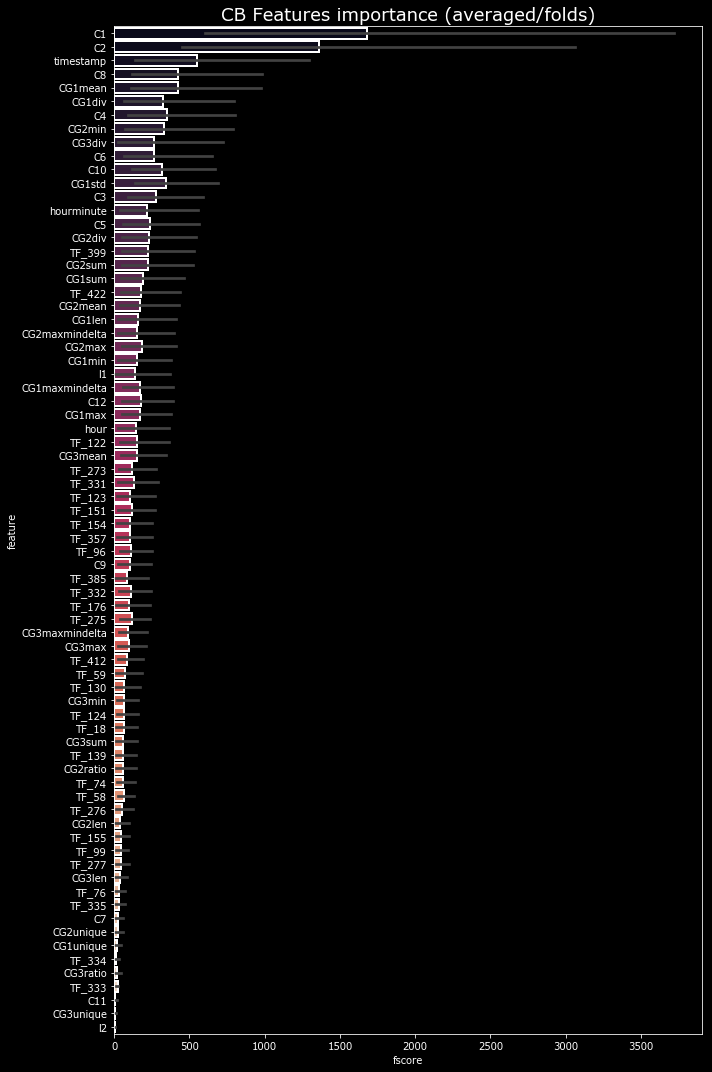

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
cols = (feature_importance_df[["feature", "fscore"]]
    .groupby("feature")
    .mean()
    .sort_values(by="fscore", ascending=False)[:80].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(10,15))
sns.barplot(x="fscore", y="feature", data=best_features.sort_values(by="fscore",ascending=False),
        edgecolor=('white'), linewidth=2, palette="rocket")
plt.title('CB Features importance (averaged/folds)', fontsize=18)
plt.tight_layout()

In [ ]:
subs = pd.read_csv('sample_submission.csv', names=['label'], header=None)[:1317220]
subs['label'] = sub_preds
subs.to_csv('finalsubmit.csv',header=False,index=False)
print('done')